### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import cv2
from skimage.io import imread
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')

### Image

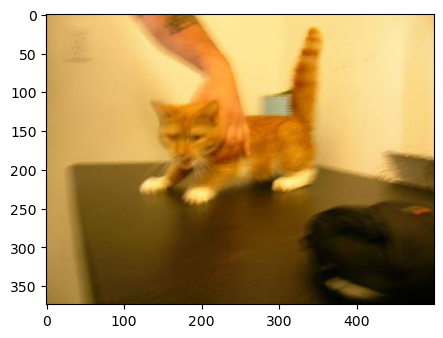

In [2]:
plt.figure(figsize= (5,5))
img1= 'C:\\Users\\DeLL\\Downloads\\train\\train\\cat.0.jpg'
plt.imshow(imread(img1))

### Convert Image to Matrix

In [3]:
img_path = 'C:\\Users\\DeLL\\Downloads\\train\\train\\cat.0.jpg'
img = imread(img_path)
img

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

In [4]:
img.shape

(374, 500, 3)

### Resize the Matrix

In [5]:
img_resize= resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [6]:
img_resize

array([[[0.85819825, 0.69248413, 0.39373799],
        [0.9234164 , 0.75469545, 0.44852468],
        [0.96381476, 0.80317173, 0.49071438],
        [0.93182606, 0.73024111, 0.44882954],
        [0.79324868, 0.49650219, 0.24610548],
        [0.78042707, 0.50435918, 0.18515407],
        [0.96339932, 0.81535171, 0.48659484],
        [0.99700349, 0.90710229, 0.59462576],
        [0.99439906, 0.90422702, 0.58577124],
        [0.98337206, 0.87297484, 0.54011701],
        [0.97381803, 0.83641234, 0.48706803],
        [0.98528003, 0.87589668, 0.56146108],
        [0.9863809 , 0.89127407, 0.59871619],
        [0.98334991, 0.89661319, 0.62040608],
        [0.97252278, 0.85336744, 0.55754735]],

       [[0.84366352, 0.67335559, 0.38221167],
        [0.89033365, 0.72026452, 0.41875235],
        [0.95141191, 0.7871264 , 0.47593232],
        [0.96378849, 0.81285442, 0.5058957 ],
        [0.87821353, 0.63390975, 0.37421883],
        [0.87581129, 0.52490066, 0.23123438],
        [0.95582158, 0.69527685,

### Flatten the Matrix

In [7]:
flatten_img= img_resize.flatten()
flatten_img.shape

(675,)

In [8]:
flatten_img

array([0.85819825, 0.69248413, 0.39373799, 0.9234164 , 0.75469545,
       0.44852468, 0.96381476, 0.80317173, 0.49071438, 0.93182606,
       0.73024111, 0.44882954, 0.79324868, 0.49650219, 0.24610548,
       0.78042707, 0.50435918, 0.18515407, 0.96339932, 0.81535171,
       0.48659484, 0.99700349, 0.90710229, 0.59462576, 0.99439906,
       0.90422702, 0.58577124, 0.98337206, 0.87297484, 0.54011701,
       0.97381803, 0.83641234, 0.48706803, 0.98528003, 0.87589668,
       0.56146108, 0.9863809 , 0.89127407, 0.59871619, 0.98334991,
       0.89661319, 0.62040608, 0.97252278, 0.85336744, 0.55754735,
       0.84366352, 0.67335559, 0.38221167, 0.89033365, 0.72026452,
       0.41875235, 0.95141191, 0.7871264 , 0.47593232, 0.96378849,
       0.81285442, 0.5058957 , 0.87821353, 0.63390975, 0.37421883,
       0.87581129, 0.52490066, 0.23123438, 0.95582158, 0.69527685,
       0.34963412, 0.99351035, 0.88915044, 0.56720286, 0.99385331,
       0.90458201, 0.581452  , 0.96450572, 0.82288213, 0.47415

#### Read the Images from the Image folder and convert them into Matrix store it into the List and covert to array to process the data

In [14]:
def load_images_from_folder(folder, image_size=(32, 32), extract_labels= True):
    images = []
    labels = []
   
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img.flatten())  # Flatten the image into a 1D array
            label = filename.split('.')[0].lower()  # Get the label from filename (lowercase)
            if extract_labels:
                label = filename.split('.')[0].lower()  # Get the label from filename (lowercase)
                if label == 'cat':
                    labels.append(0)
                elif label == 'dog':
                    labels.append(1)
                else:
                    print(f"Ignoring file {filename} due to unrecognized label '{label}'.")
            else:
                labels.append(-1)  # Placeholder for test labels
    return np.array(images), np.array(labels)

In [15]:
train_folder='C:\\Users\\DeLL\\Downloads\\train\\train'

In [16]:
train_images,train_labels=load_images_from_folder(train_folder, extract_labels=True)

In [17]:
train_images

array([[ 93, 171, 210, ...,   1,   3,   3],
       [ 41,  37,  33, ...,  31,  36,  51],
       [ 61,  55,  46, ...,   4, 193, 194],
       ...,
       [ 34,  37,  41, ...,  98, 133, 163],
       [246, 245, 250, ..., 110, 112, 123],
       [243, 251, 254, ..., 254, 254, 254]], dtype=uint8)

In [18]:
train_images.shape

(24999, 3072)

In [19]:
train_labels

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
test_folder='C:\\Users\\DeLL\\Downloads\\test1\\test1'

In [22]:
test_images,test_labels=load_images_from_folder(test_folder, extract_labels=False)

In [23]:
test_images

array([[110,  71,  45, ..., 122, 132, 145],
       [  5,  10,   8, ...,  76,  61,  85],
       [  3,   3,   3, ..., 249, 248, 240],
       ...,
       [154, 247, 230, ..., 117, 120, 124],
       [ 98,  72, 189, ..., 110,  83, 186],
       [ 73,  74,  80, ..., 254, 249, 180]], dtype=uint8)

In [60]:
test_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [26]:
# Check class distribution in the entire dataset
unique, counts = np.unique(train_labels, return_counts=True)
print(f"Class distribution in the entire dataset: {dict(zip(unique, counts))}")

# Determine the number of samples to select from each class
num_samples_per_class = 2500  # Adjust as needed

# Initialize lists to store subset data
selected_images = []
selected_labels = []

# Select subset ensuring balanced classes
for class_label in np.unique(train_labels):
    class_indices = np.where(train_labels == class_label)[0]
    np.random.shuffle(class_indices)  # Shuffle indices
    selected_indices = class_indices[:num_samples_per_class]
    selected_images.extend(train_images[selected_indices])
    selected_labels.extend(train_labels[selected_indices])

# Convert lists to numpy arrays
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Check class distribution in the selected subset
unique_subset, counts_subset = np.unique(selected_labels, return_counts=True)
print(f"Class distribution in the selected subset: {dict(zip(unique_subset, counts_subset))}")

Class distribution in the entire dataset: {0: 12499, 1: 12500}
Class distribution in the selected subset: {0: 2500, 1: 2500}


### Split the data into training and testing

In [28]:
# Split the selected subset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(selected_images, selected_labels, test_size=0.2, random_state=1, stratify=selected_labels)

### Building a Model

In [29]:
from sklearn.svm import SVC
svm_classifier= SVC(kernel='linear', random_state=1, verbose= True)

In [30]:
svm_classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', random_state=1, verbose=True)

In [31]:
y_predicted= svm_classifier.predict(X_valid)

### Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_valid,y_predicted)
score

0.549

### Cross - Validation

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_classifier, selected_images, selected_labels, cv= 10)
cross_val_score

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.508, 0.542, 0.55 , 0.516, 0.538, 0.578, 0.484, 0.596, 0.556,
       0.506])

In [35]:
mean_accuracy= cross_val_score.mean()
mean_accuracy

0.5374000000000001

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,y_predicted))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       500
           1       0.55      0.54      0.55       500

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000



In [37]:
predictions=svm_classifier.predict(test_images)

In [61]:
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
pred= pd.DataFrame(predictions)

In [70]:
sub_df = pd.read_csv('sampleSubmission.csv')

In [71]:
datasets= pd.concat([sub_df['id'],pred] , axis=1)

In [72]:
datasets.columns = ['id','label']

In [73]:
datasets.to_csv('sampleSubmission.csv', index= False)

In [74]:
datasets.head()

,id,label
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1


In [75]:
downloads_path = 'C:\\Users\\DeLL\\Downloads\\sampleSubmission.csv'

In [76]:
datasets.to_csv(downloads_path, index= False)